# Le modèle linéaire gaussien

# Les moindres carrés

On dispose de données: des inputs `x[i]` et des outputs `y[i]`. On cherche à expliquer l'influence des premier sur les seconds. 

ex: 
* `x[i]` est la surface du `i`-ième appartement
* `y[i]` est le prix du `i`-ième appartement

Dans ce cas, il est naturelle de supposer qu'il y a une relation affine entre `x` et `y`: 

	y[i] = w[0] + w[1] x[i] + bruit[i]

Dans le programme suivant, on crée des données artificielles qui suivent parfaitement ce modèle. On estime `w` par la formule des moindres carrés (cf. explication plus bas).  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
% matplotlib inline
np.set_printoptions(precision=2,suppress=True)

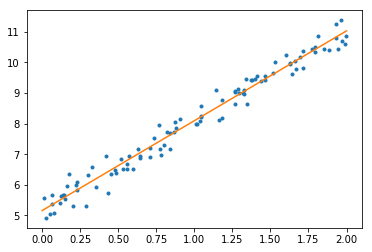

In [2]:
def createData_one_input(nbData: int, sigma=0.3):
    x = np.random.random(nbData) * 2
    w1 = 3
    w0 = 5
    y = w1 * x + w0 + np.random.normal(0, sigma, size=[nbData])
    return x, y

nbData=100
x,y=createData_one_input(nbData)
x_ext=np.zeros(shape=[nbData,2])
x_ext[:,0]=np.ones(shape=nbData)
x_ext[:,1]=x

""" ( X^T X )^(-1) """
XTX_1 = np.linalg.inv(x_ext.T @ x_ext)
hat_w = XTX_1 @ x_ext.T @ y

plt.plot(x, y, '.')
xx=np.linspace(0,2,10)
plt.plot(xx, hat_w[0]+hat_w[1]*xx);


*** Question: *** Est-ce que cela marche aussi avec les données suivantes ? 

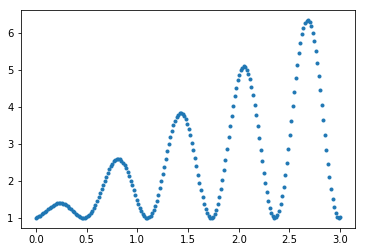

In [3]:
def create_deterministic_input(nbData:int):
    x=np.linspace(0,3,nbData)
    y=x*np.sin(10*x)+x+1
    return x,y
x,y=create_deterministic_input(200)
plt.plot(x,y,'.');

*** Exo théorique: *** 

Notons $X$ la matrice à deux colonnes définie par: 
* la première colonne est constante: $X_{i,0}=1$
* la seconde colonne contient les input: $X_{i,1}=$`x[i]`.
Notons $Y$ la matrice colonne contenant les output `y[i]`. 

La technique des moindres carrés consiste à trouver 
$$
\hat w =  \hbox{argmin}_w \| Y  -  X w \|^2 =   \hbox{argmin}_w ( Y  -  X w)^T (Y -  X w)  
$$
le minimum étant cherché parmi tous les vecteurs colonnes $w=(w_0,w_1)^T \in \mathbb{R}^2$. 

* Calculez la différentelle de $w \to  ( Y  -  X w)^T (Y -  X w) $ en développant le produit matriciel. 
* Cherchez l'endroit où cette différentielle s'annule.  
* Justifiez que ce point est un minimum global (une simple remarque sur la forme de la fonction suffit).

Vous aurez alors démontrer que:
$$
\hat w= (X^T X) ^{-1} X^T Y
$$


***Aide:*** Pour calculer la différentielle d'une fonction à plusieurs variables, on peut: ou bien calculer les dérivèes partielles et les recoller dans une matrice, ou bien simplement essayer de trouver une formule du type: 
$$
   f(w+\epsilon) = f(w) + \hbox{differential}(\epsilon) + o (\epsilon) 
$$
Ici la seconde technique marche très bien. 


***Question:*** Qu'est-ce qu'on aurait trouvé si on avait oublié de rajouter une colonne de 1 dans la matrice $X$ ? Supprimer cette colonne de 1 dans les programmes précédents et observer la dégradation de l'ajustement. Cela vous permettra de ne plus jamais l'oublier cette colonne de 1. 




 

#  Des inputs plus nombreux


Les moindres carrés se généralise immédiatement avec $n$-input. Seule la représentation graphique est moins sympa. 

Observez le programme suivant. Essayer de vous représenter le plot obtenu en 3D. Eventuellement, tracez-le avec matplotlib en 3D. 

hat_w: [ 4.05  1.88  4.26]


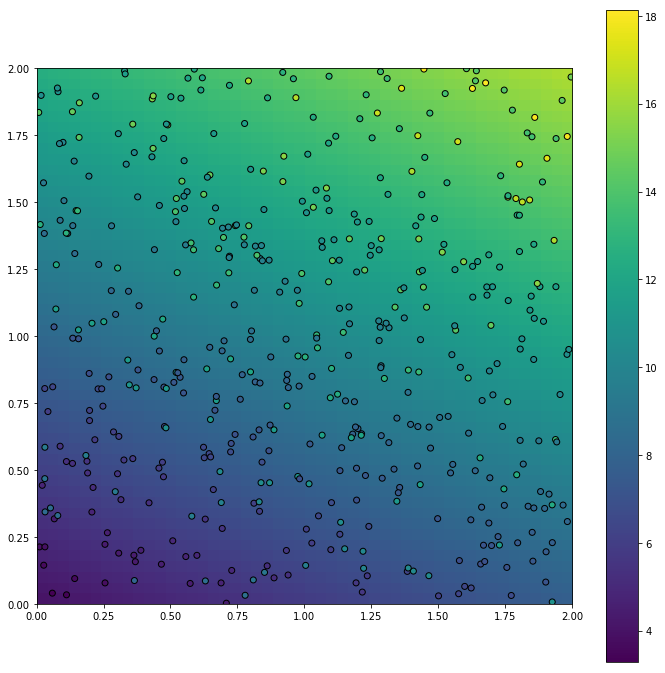

In [4]:
def createData_two_output(nbData: int):
    x = np.random.random([nbData, 2]) * 2
    w = np.array([2., 4])
    w0 = 5
    '''y[i] = sum_j x[ij] w[j]  '''
    y = np.sum(x * w, axis=1) + w0 +  np.random.choice(a=[2,-2],p=[0.3,0.7],size=[nbData])
    return x, y

nbData=500
x,y=createData_two_output(nbData)
x_ext=np.zeros(shape=[nbData,3])
x_ext[:,0]=np.ones(shape=nbData)
x_ext[:,1:]=x

""" ( X^T X )^(-1) """
XTX_1 = np.linalg.inv(x_ext.T @ x_ext)
hat_w = XTX_1 @ x_ext.T @ y
#hat_Y= x_ext @ hat_w

print("hat_w:",hat_w)

plt.figure(figsize=(12,12))
mini,maxi=np.min(y),np.max(y)
xx=np.linspace(0,2)
x_1, x_2 = np.meshgrid(xx, xx)
hat_Y= hat_w[0]+hat_w[1]*x_1+hat_w[2]*x_2
plt.imshow(hat_Y,
           origin='lower',
           extent=[0,2,0,2],
           norm=plt.Normalize(vmin=mini, vmax=maxi))


plt.scatter(
            x[:, 0],
            x[:, 1],
            marker='o',
            c= y,
            edgecolors="k",
            norm=plt.Normalize(vmin=mini, vmax=maxi)
        )

plt.xlim(0,2)
plt.ylim(0,2)
plt.colorbar();


***Énigme:*** Pourquoi le `hat_w` trouvé est plus petit que le vrai `w=[5,2,4]` ? Si vous trouvez la réponse, demandez-vous ce que doit vérifier un "bruit" pour mériter son nom... 

# Le bruit est maintenant gaussien (ou pas loin)
### on peut faire des stats

Maintenant on suppose précisément que nos observations $y_i$ (petit $y$) sont des réalisations de v.a $Y_i$ (grand $Y$) telles que: 
$$
    Y_i = w \cdot x_i  + Bruit_i
$$
et que $Bruit_i$ ce sont des v.a gaussiennes centrées de variance $\sigma^2$ (qui ne dépend pas de i). En d'autre terme:
$$
    Y_i \sim \hbox{Normale} (esp = \mu_i , var = \sigma^2 ),  \qquad  \mu_i =  w \cdot  x_i
$$
La densité de probabilité des $Y_i$ est, à une constante près: 
$$
      L(y_0,y_1,...) =  \prod_i \exp (\frac{ y_i - w \cdot x_i}{2 \sigma}  )^2
$$
Donc le paramètre $w$ qui rend le plus vraisemblable les observations $y_i$ (petit $y$) c'est tout simplement
$$
  \hat w= \hbox{argmax}_w \prod_i \exp (\frac{ y_i - w \cdot   x_i }{2 \sigma}  )^2
$$


*** Exo: *** Par une habile utilisation de la fonction log, montrez que l'on retombe exactement sur le $\hat w$ des moindres carrés ! 


Cet exercisse peut être décourageant: à quoi bon avoir supposer autant de chose sur nos données, pour au final retomber sur l'ajustement des moindre carré? 

Réponse: on peut estimer des tas d'autre paramètre:
* la variance du bruit
* la variances des estimateurs $\hat w_i$
* faire un test pour savoir si l'un des $w_i$ est nul. Ce qui revient à dire que le i-ième input n'a aucune influence sur l'output. Ce genre de considération est importante, car on cherche à expliquer l'output de la manière la plus simple possible.  


In [5]:
""" observez la génération des données: parmi les inputs, deux n'ont aucune influence  """
def createData_four_input(nbData: int, sigma=0.3):
    w0 = 5
    w = np.array([0., 2, 1, 0])
    x = np.random.random([nbData, 4]) * 2
    y =  x @ w + w0 + np.random.normal(0, sigma, size=[nbData])
    return x, y


nbData=100
nbInput=4
x,y=createData_four_input(nbData)
x_ext=np.zeros(shape=[nbData,nbInput+1])
x_ext[:,0]=np.ones(shape=nbData)
x_ext[:,1:]=x

""" ( X^T X )^(-1) """
XTX_1 = np.linalg.inv(x_ext.T @ x_ext)
w_hat = XTX_1 @ x_ext.T @ y
Y_hat= x_ext @ w_hat

""""    Estimateur de la variance du bruit
Au dénominateur, le ( - nbDescriptors -1)  c'est pour rendre l'estimateur sans biais   """
sigma_hat = np.sqrt(np.sum((y - Y_hat) ** 2) / (nbData - nbInput - 1))
print("sigma_hat: ",sigma_hat)


"""  Estimateur de la variance des w_hat
(c'est la variance du bruit multipliée par un coefficient qui dépend de la matrice X"""
std_err= sigma_hat * np.sqrt(np.diag(XTX_1))


""" T-scores. Se sont  les w_hat[j] renormaliser: quand le vrai w[j] est nul, T-score[j] est une 'petite' variable aléatoire.
* T_score[j] petit  =>  hypothèse H_0[j]  :  w[j] est nul
* T_score[j] grand  =>  hypothèse H_1[j]  :  w[j] est non-nul"""
T_scores= w_hat / std_err

"""p-values associées. Attention, l'ordre de grandeur est inversé:
* p-value[j]  petite => hypothèse H_1[j]  => w[j] est non-nul
* p-value[j]  grande => hypothèse H_0[j]  => w[j] est nul """
pValues=2*stats.t.sf(np.abs(T_scores),nbData-nbInput)
print("T_scores:",T_scores)
print("pValues: ",pValues)



sigma_hat:  0.320913703754
T_scores: [ 41.49   1.1   31.62  17.47  -0.2 ]
pValues:  [ 0.    0.28  0.    0.    0.85]


Pour bien comprendre les calculs précédents, il faut connaitre les tests statistiques. Nous n'entrons pas dans les détails, mais expliquons simplement la recette: 
* On choisit un niveau de test, disons $\alpha=5\%$.
* Quand `p-value[j]`$<\alpha$, on choisi l'hypothèse H1 c.à.d qu'on décrète que `w[j]` est non-nul.
* Quand `p-value[j]`$>\alpha$, on choisi l'hypothèse H0 c.à.d qu'on décrète que `w[j]` est nul, donc les input `x[:,j]` n'ont pas d'influence sur l'output, on pourrait supprimer cette colonne de notre base de donnée. 


La théorie nous indique que:
* lorsque le vrai `w[i]` est nul, alors `p-value[j]`$<\alpha$ dans seulement $\alpha$=5% des cas.
* lorsque le vrai `w[i]` est nul, alors `p-value[j]` est "presque-toujours" éloigné de zéro (et même proche de 1 quand le nombre de ligne et grand) 

*** Le jeu des 5%:***  Transformez le programme précédent en une fonction qui vous indique si vous gardez ou pas le `j`-ième input. Lancez un grand nombre de fois votre programme. Constatez que dans 5% des cas, le programme se trompe pour `j=1` et `j=4`. Par contre, il devrait quasi jamais se tromber pour `j=0`, `j=2` et `j=3` 



# Pas que linéaire


Le modèle linéaire permet de modéliser des relations non-linéaires entre l'input et l'output. Et c'est à vous même de deviner comment on procède! Observez cet exemple. Un indice supplémentaire est donné plus loin. 


Dans le jeu de données suivant: 
* l'input est le nombre de followers de youtubers
* l'output est son revenu

Essayer d'ajuster une fonction `f` telle que `y[i] ~ f(x[i])`. Pour cela, vous n'avez besoin que des outils présenté dans cette fiche.  

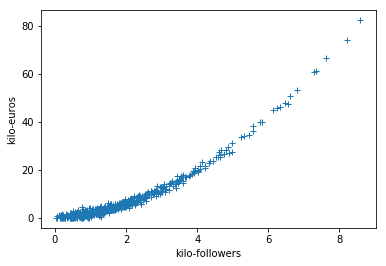

In [6]:
x_y=np.loadtxt('data/youtuber_incomes.csv', delimiter=',')
x= x_y[:, 0]
y= x_y[:, 1]

plt.plot(x, y, '+', label='train')
plt.xlabel("kilo-followers")
plt.ylabel("kilo-euros");
    

*** Aide: *** Précédemment, nous avions ajusté des fonctions affine en utilisant le modèle linéaire: en rajoutant un input `x[0]` partout constant. Nous avions donc "enrichi" les inputs. A vous d'enrichir maintenant!  